### Item 6

Aplique o detector de canny usando a função Canny() da OpenCV em uma ou mais imagens de sua escolha. Experimente variar cada um dos parâmetros threshold1, threshold2 e apertureSize. Explique com suas palavras a influência de cada parâmetro no resultado.

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [8]:
def plot_compare(*args, title=None, cmap='viridis'):
    L = len(args)

    if (L == 0): return None
    
    if (L == 1):
        f = plt.figure(figsize=(20,20))
        plt.imshow(args[0], cmap=cmap)
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(30,30))
        for i, ax in enumerate(axs):
            ax.imshow(args[i], cmap=cmap)
            ax.axis('off')

    if (title is not None):
        plt.title(title)
    plt.show()
    
    return f 


### Imagens originais

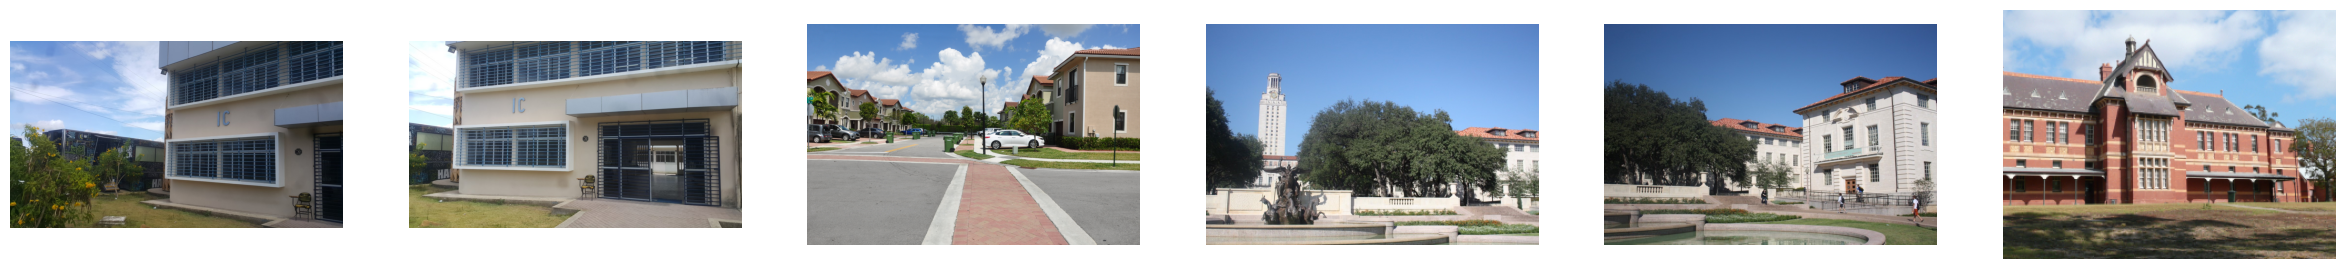

In [9]:
images = [cv2.cvtColor(cv2.imread(f'images/{i}.jpg'), cv2.COLOR_BGR2RGB) for i in range(1,6+1)]

original = plot_compare(*images)
original.savefig("./results/original.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

In [10]:
def cannify(image, preset, lines_only=True):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, threshold1=preset["low_threshold"], threshold2=preset["high_threshold"], apertureSize=preset["aperture_size"], L2gradient=True)

    if lines_only:
        return edges

    result = image.copy()
    result[edges != 0] = [255, 0, 0]

    return result

### Canny

No canny, o threshold 1 é o limite onde iniciam as chamadas "Bordas fracas", o threshold 2 é o limite onde iniciam as chamadas "Bordas fortes". O apertureSize controla o tamanho do kernel para gerar o gradiente que é utilizado para detectar as bordas. Um apertureSize maior teoricamente diminui o efeito de ruído na detecção; na prática, para as imagens selecionadas, aumentar para um kernel 5x5 ou 7x7 só atrapalhou a detecção, a textura em partes mais detalhadas das imagens, como no chão da rua, começou a ser toda detectada como centenas de pequenas bordas, por isso, o valor escolhido para o apertureSize foi 3. Para a escolha do threshold 1 e do threshold 2, levei em consideração o quanto detalhe era retido nas bordas detectadas, sem que começasse a entrar ruído na forma de vários pequenos segmentos. O valor recomendado online de 86 para o 1 e 255 para o 2 (ou seja, não existem bordas fortes na imagem), não se adequou bem; Acabei escolhendo 100 como threshold 1 e 150 como threshold 2, por manter bem o detalhe, enquanto evita ruído demasiado.

In [11]:
presets = [
    #{"aperture_size": 3, "low_threshold": 50,  "high_threshold": 100},
    #{"aperture_size": 3, "low_threshold": 50,  "high_threshold": 150},
    #{"aperture_size": 3, "low_threshold": 50,  "high_threshold": 200},
    #{"aperture_size": 3, "low_threshold": 50,  "high_threshold": 255},

    #{"aperture_size": 3, "low_threshold": 86,  "high_threshold": 100},
    #{"aperture_size": 3, "low_threshold": 86,  "high_threshold": 150},
    #{"aperture_size": 3, "low_threshold": 86,  "high_threshold": 200},
    #{"aperture_size": 3, "low_threshold": 86,  "high_threshold": 255},

    #{"aperture_size": 3, "low_threshold": 100, "high_threshold": 150},
    #{"aperture_size": 3, "low_threshold": 100, "high_threshold": 200},
    #{"aperture_size": 3, "low_threshold": 100, "high_threshold": 255},

    #{"aperture_size": 3, "low_threshold": 50, "high_threshold": 50},
    #{"aperture_size": 3, "low_threshold": 86, "high_threshold": 86},
    #{"aperture_size": 3, "low_threshold": 100, "high_threshold": 100},
    #{"aperture_size": 3, "low_threshold": 127, "high_threshold": 127},
    #{"aperture_size": 3, "low_threshold": 150, "high_threshold": 150},
    #{"aperture_size": 3, "low_threshold": 200, "high_threshold": 200},

    #{"aperture_size": 5, "low_threshold": 50, "high_threshold": 100},
    #{"aperture_size": 5, "low_threshold": 50, "high_threshold": 200},
    #{"aperture_size": 5, "low_threshold": 100, "high_threshold": 150},
    #{"aperture_size": 5, "low_threshold": 100, "high_threshold": 200},
    #{"aperture_size": 5, "low_threshold": 127, "high_threshold": 127},

    #{"aperture_size": 7, "low_threshold": 50, "high_threshold": 100},
    #{"aperture_size": 7, "low_threshold": 50, "high_threshold": 200},
    #{"aperture_size": 7, "low_threshold": 100, "high_threshold": 150},
    #{"aperture_size": 7, "low_threshold": 100, "high_threshold": 200},
    #{"aperture_size": 7, "low_threshold": 127, "high_threshold": 127},
]

for preset in presets:
    name = f"{preset['aperture_size']}-{preset['low_threshold']}-{preset['high_threshold']}"
    
    outlined = [cannify(image, preset, lines_only=False) for image in images]
    result = plot_compare(*outlined, title=name, cmap='gray')
    result.savefig(f"./experiment/{name}.jpg", dpi=500, bbox_inches='tight', pad_inches=0.1)

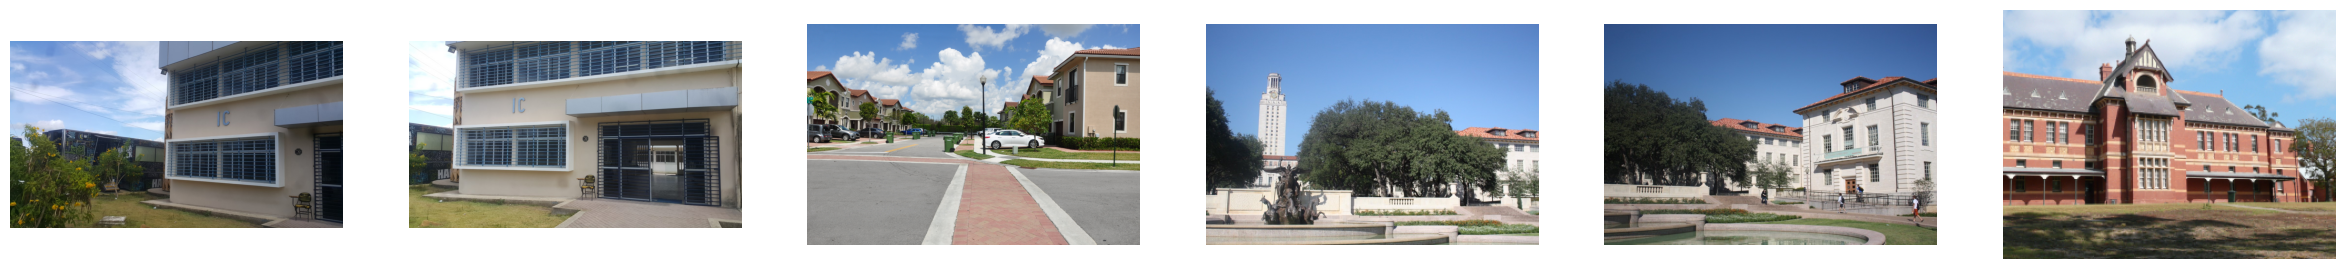

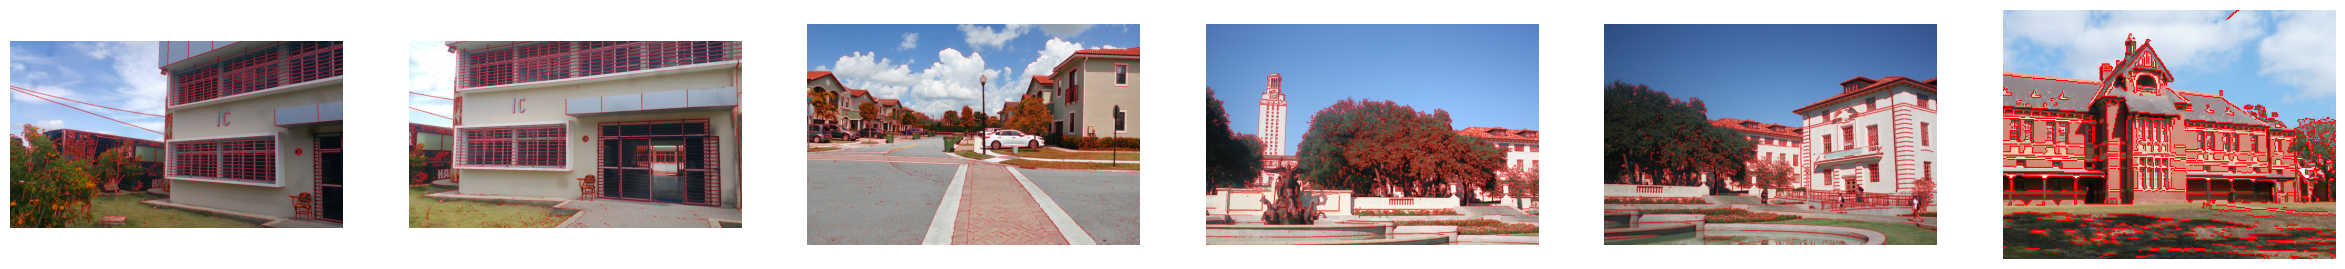

In [12]:
plot_compare(*images)

selected = {"aperture_size": 3, "low_threshold": 100, "high_threshold": 150}
outlined = [cannify(image, selected, lines_only=False) for image in images]

result = plot_compare(*outlined, cmap='gray')
result.savefig("./results/selected.jpg", dpi=500, bbox_inches='tight', pad_inches=0.1)